# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM NM1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [ ]:
''' Purpose & Process:

Libraries Import: The code imports several essential libraries for data loading, manipulation, visualization, and model building.
pandas for data processing and manipulation.
matplotlib.pyplot and seaborn for data visualization.
numpy for numerical operations and linear algebra.
scipy.stats.norm for statistical functions related to normal distributions.
StandardScaler from sklearn.preprocessing for data preprocessing.
warnings for handling warnings, and the command warnings.filterwarnings('ignore') is used to suppress warnings.
Matplotlib Inline Display: %matplotlib inline is a magic command in Jupyter Notebooks, ensuring that Matplotlib plots are displayed directly below the code cells.
Global Constants: The constant PARAMETER_CONSTANT is set to '###', possibly for use as a placeholder or global parameter throughout the notebook.
Results & Findings:

This code block does not generate any visible output or results directly. Instead, it establishes the environment for subsequent data analysis and modeling by importing necessary libraries, setting display options, and configuring warning handling.
Impact on the Dataset:

The code itself doesn't modify the dataset. However, it sets the stage for subsequent data processing, visualization, and model building by importing relevant libraries and configuring the environment.
Additional Notes:

The pd.set_option calls are used to set display options for pandas, ensuring that a maximum of 100 columns and 100 rows will be displayed when printing DataFrames. This can be useful for better readability when working with large datasets.
The %matplotlib inline command is specific to Jupyter Notebooks and ensures that plots generated using Matplotlib will be displayed within the notebook itself.
'''

In [231]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd  # Data processing and manipulation 
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import numpy as np  # Numerical operations and linear algebra 

# Libraries for data preparation and model building
from scipy.stats import norm  # Statistical functions
from sklearn.preprocessing import StandardScaler  # Data preprocessing
import warnings  # Warning handling
warnings.filterwarnings('ignore')  # Ignore warnings

# Display Matplotlib plots in Jupyter Notebook
%matplotlib inline  

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = '###'

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [ ]:
''' Purpose & Process:

Data Loading: The code uses the pd.read_csv function from the pandas library to load two datasets - df_train and df_test - from CSV files named 'df_train.csv' and 'df_test.csv', respectively.
File Paths: The file paths ('df_train.csv' and 'df_test.csv') suggest that these datasets are related to training and testing data for a machine learning model.
Results & Findings:

The datasets df_train and df_test are loaded into memory.
Impact on the Dataset:

The datasets are now available in the variables df_train and df_test for further analysis, exploration, and modeling.
Additional Notes:

It would be useful to follow this code with a preview of the loaded datasets, such as df_train.head() and df_test.head(), to provide a quick look at the structure and contents of the data.
The CSV files contain tabular data, and the code assumes default settings for pd.read_csv. If there are specific settings or parameters needed for reading the data, those could be added as arguments to the read_csv function.
'''

In [276]:
df_train = pd.read_csv('df_train.csv') # load the train dataset, used the pandas read_csv() to import our dataset
df_test = pd.read_csv('df_test.csv') # load the test dataset, used the pandas read_csv() to import our dataset
#Preview the dataset


In [ ]:
'''Interpretation:

The df_train.head() code is used to display the first few rows of the df_train DataFrame. This is a common practice in data analysis to quickly inspect the structure and content of the loaded dataset.

Purpose & Process:

Data Preview: The purpose of this code is to provide a quick preview of the first few rows of the df_train DataFrame.
DataFrame Method: The head() method in pandas is used to retrieve the first 5 rows (by default) of the DataFrame. This helps in understanding the columns, data types, and some sample values.
Results & Findings:

The output will be a tabular representation of the first few rows of the df_train DataFrame.
Impact on the Dataset:

This code does not modify the dataset but provides a visual representation of the initial rows, aiding in the initial assessment of the data's structure and characteristics.
Additional Notes:

Adjusting the number inside the parentheses, like df_train.head(10), would show a different number of rows (in this case, 10). This can be helpful when a more extensive preview is needed.
The displayed output includes the column names, data types, and some sample values from the dataset, which can be useful for data exploration.'''

In [277]:
df_train.head() 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
'''Interpretation:

The df_test.head() code is used to display the first few rows of the df_test DataFrame. Similar to the interpretation of df_train.head(), this code provides a quick look at the structure and content of the loaded test dataset.

Purpose & Process:

Data Preview: The primary purpose is to provide a quick preview of the first few rows of the df_test DataFrame.
DataFrame Method: The head() method in pandas is used to retrieve the first 5 rows (by default) of the DataFrame, allowing a brief examination of the columns, data types, and sample values.
Results & Findings:

The output will be a tabular representation of the first few rows of the df_test DataFrame.
Impact on the Dataset:

This code does not modify the dataset. Its impact is informational, providing an initial overview of the test dataset.
Additional Notes:

As with df_train.head(), adjusting the number inside the parentheses, like df_test.head(10), would display a different number of rows for a more extensive preview.
The displayed output includes the column names, data types, and some sample values, assisting in the initial exploration of the test dataset.'''

In [278]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [ ]:
'''Interpretation:

The pd.concat([df_train, df_test]) code is used to concatenate (combine) the df_train and df_test DataFrames along the rows (axis=0), creating a new DataFrame df. The head() method is then used to display the first few rows of the concatenated DataFrame.

Purpose & Process:

Data Concatenation: The primary purpose is to combine the training and test datasets vertically, creating a single DataFrame, df, that contains all the rows from both datasets.
Concatenation Method: The pd.concat() function from pandas is employed for concatenation. The argument [df_train, df_test] is a list of DataFrames to be concatenated.
Resulting DataFrame: The concatenated DataFrame, df, contains all the rows from df_train followed by all the rows from df_test.
Results & Findings:

The output will be a tabular representation of the first few rows of the concatenated DataFrame df.
Impact on the Dataset:

The concatenation results in a new DataFrame, df, which now includes both the training and test data. The df_train and df_test DataFrames remain unchanged.
Additional Notes:

It's assumed that the columns in df_train and df_test are identical; otherwise, concatenation along rows might lead to misalignment.
This operation is commonly done when preparing data for machine learning, where the training and test datasets need to be treated together, often for consistent feature engineering or preprocessing.
The resulting df DataFrame may be used for further exploration, cleaning, and modeling.'''

In [279]:
df = pd.concat([df_train,df_test])
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


<b>Check the shape of the dataset</b>
- It is a good practise to first check the sape of the dataset so as to get a general overview of what our dataset is about

In [ ]:
'''Interpretation:

The shape = df.shape code calculates the shape (number of rows and columns) of the concatenated DataFrame df, and print('The shape of the dataset: ', shape) prints the result.

Purpose & Process:

Shape Calculation: The primary purpose is to determine the number of rows and columns in the DataFrame df.
DataFrame Shape: The shape attribute of a DataFrame is a tuple representing the dimensions (number of rows, number of columns).
Print Statement: The print statement is used to display the shape information in a human-readable format.
Results & Findings:

The output will be a message indicating the shape of the concatenated DataFrame df.
Impact on the Dataset:

This code does not modify the dataset. It simply provides information about its dimensions.
Additional Notes:

The shape variable holds a tuple, so shape[0] corresponds to the number of rows, and shape[1] corresponds to the number of columns.
Understanding the shape of the dataset is crucial for various tasks, such as setting up machine learning models, checking data integrity, and understanding the dataset's structure.'''

In [280]:
# print the shape
shape = df.shape
print('The shape of the dataset: ', shape)

The shape of the dataset:  (11683, 49)


Now we can see that the dataset contains <b>11683 instances </b>,  <b>48 variables</b> and <b>1 target</b> 
NB: The unnamed intial column contains the ID number of each observation which is negligible .

<b>Summary of the Dataset</b>

<b>Dataset description</b>
- The dataset contains several columns which holds data about the environmental atmospheric conditions of different cities within Spain; <b>(Madrid, Valencia, Seville, Bilbao and Barcelona)</b>.
- Showing the data repressentations of various weather and atmospheric conditions such as <b>Cloud, humidity, wind, rainfall, snow, temparature and pressure</b>
- It also contains both numerical and categorical data with data types ranging between float, integer and object data types.
- The first column without variable name is the observation_ID

<b>Important Points and Variable description of the Dataset</b><br>
<b>Features</b>
- time: Time at which the data was recorded
- {City Name}_wind_speed: The wind speed at a specific time interval for the named city.
- {City Name}_wind_degree: The strength of the wind for the named city at a specific time interval - expressed as a category.
- {City Name}_rain_1h: A metric expressing the amount of rain that has fallen in the past hour in a particular city.
- {City Name}_rain_3h:A metric expressing the amount of rain that has fallen in the past three hours in a particular city.
- {City Name}_humidity: The level of humidity as measured at the defined time for the specific city mentioned.
- {City Name}_clouds_all: The level of cloud coverage as measured at the specified point in time for the specific city mentioned.
- {City Name}_pressure: The atmospheric pressure for the named city at a specific time interval - expressed as a category.
- {City Name}_snow_3h: A metric expressing the amount of snow that has fallen in the past three hours in a particular city.
- {City Name}_weather_id: A metric used to explain the weather condition of a specific city at a specified time.
- {City Name}_temp_max: The maximum temperature for a specific city at a point in time.
- {City Name}_temp_min: The minimum temperature for a specific city at a point in time.
- {City Name}_temp: The average temperature for a specific city at a point in time.<br>

<b>Target Variable</b>
- load_shortfall_3h: The difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows.

<b>Statiscal Properties of the Dataset</b>

In [ ]:
'''Interpretation:

The df.describe() code generates descriptive statistics of the concatenated DataFrame df. This method provides summary statistics of the numerical columns in the DataFrame, such as mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.

Purpose & Process:

Descriptive Statistics: The primary purpose is to obtain a summary of the statistical measures for each numerical column in the DataFrame.
DataFrame Method: The describe() method in pandas is used to generate these statistics.
Results & Findings:

The output will be a table showing various descriptive statistics for each numerical column in the DataFrame.
Impact on the Dataset:

This code does not modify the dataset. It provides valuable insights into the distribution and central tendency of numerical features in the concatenated DataFrame.
Additional Notes:

Descriptive statistics are useful for understanding the distribution of numerical data, identifying outliers, and gaining a general overview of the dataset.
Non-numerical columns are excluded from the output. If there are categorical or object-type columns, additional methods may be needed to summarize them.
Including this step in the analysis is common during the exploratory data analysis (EDA) phase of a data science project.'''

In [281]:
# Statiscal Properties of the Dataset which helps us to view the Statiscal Properties of numerical variables in the dataset, it excludes character variables
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,9161.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1012.346687,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.817473,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1010.666667,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1015.000000,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,260.000000,38.333333,3.333333,0.000000,0.000000,0.000000,1.021167e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1023.333333

In [ ]:
'''The df.columns code is used to display the column labels (names) of the concatenated DataFrame df. It returns a list of column names.

Purpose & Process:

Column Labels Retrieval: The primary purpose is to obtain a list of column names present in the DataFrame df.
DataFrame Attribute: The columns attribute of a DataFrame is accessed to retrieve the column names.
Results & Findings:

The output will be a list of column names present in the concatenated DataFrame df.
Impact on the Dataset:

This code does not modify the dataset. It provides a quick reference to the names of columns in the DataFrame.
Additional Notes:

Understanding the column names is crucial for subsequent data manipulation, analysis, and modeling.
The list of column names can be used to select specific columns, perform data cleaning, or set up features and target variables for machine learning models.
Including this step early in the analysis helps in getting acquainted with the available features in the dataset.'''

In [282]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

<b>Data Cleaning</b>

In [ ]:
'''The df_clean = df code creates a new DataFrame df_clean that is a reference to the same data as the original DataFrame df. The df_clean.info() code is then used to display a concise summary of the information about the df_clean DataFrame.

Purpose & Process:

DataFrame Copying: The code df_clean = df creates a new reference (df_clean) to the same DataFrame as df. This means both variables point to the same underlying data.
DataFrame Information: The info() method provides a concise summary of the DataFrame's information, including the data types, non-null counts, and memory usage.

Results & Findings:
The output will be a summary of the information about the df_clean DataFrame.

Impact on the Dataset:
The creation of df_clean as a reference does not modify the underlying dataset. It essentially gives an alternative name to the same data.
The info() method helps in understanding the data types, identifying missing values, and assessing the memory usage of the DataFrame.
Additional Notes:

It's important to note that modifying one DataFrame (e.g., dropping or filling missing values) will affect both df and df_clean since they reference the same data.
If a separate copy of the DataFrame is needed to preserve the original data, the copy() method should be used: df_clean = df.copy(). This ensures that changes to one DataFrame do not affect the other.'''

In [283]:
df_clean = df
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

<b>Check for Duplicated variables and instances</b>
- Check through th columns to remove variables with repeating row values. The code retains the first occurence of the variables
- Next cell checks for duplicated values in observation

In [ ]:
'''The provided code is a loop that iterates over the columns of the DataFrame df, checks for duplicate columns with identical values, and creates a new DataFrame df_clean containing only the unique columns.

Purpose & Process:

Duplicate Column Removal: The purpose is to identify and remove duplicate columns in the DataFrame df.
Loop Over Columns: The code iterates over each column in the DataFrame.
Column Values Check: It checks if the values in the current column are identical to the values of any previously seen column. If not, the column is considered unique, and its name is added to the list of columns to keep (columns_to_keep).
New DataFrame Creation: The final step creates a new DataFrame df_clean containing only the unique columns.
Results & Findings:

The resulting df_clean DataFrame contains only the columns that were identified as unique based on their values.
Impact on the Dataset:

The original DataFrame df remains unchanged. The new DataFrame df_clean is a subset of the original DataFrame, containing only the unique columns.
Additional Notes:

This method of identifying duplicate columns is based on comparing the entire column values. If columns have the same values but in a different order or have different data types, they won't be considered duplicates.
The order of columns in df_clean will match the order in which they were encountered in the loop.
If column order is not important, sorting columns_to_keep before selecting columns (df_clean = df[columns_to_keep]) could be considered.
'''

In [284]:
# Create a set to keep track of seen column values
seen_values = set()

# Create a list to store columns to keep
columns_to_keep = []

for column in df.columns:
    column_values = df[column].values
    column_tuple = tuple(column_values)

    if column_tuple not in seen_values:
        seen_values.add(column_tuple)
        columns_to_keep.append(column)

# Create a new DataFrame with only the columns to keep
df_clean = df[columns_to_keep]

In [ ]:
'''
The df_clean.duplicated() code checks for duplicate rows in the DataFrame df_clean and returns a boolean Series indicating whether each row is a duplicate of a previous row.

Purpose & Process:

Duplicate Row Check: The primary purpose is to identify duplicate rows in the DataFrame df_clean.
DataFrame Method: The duplicated() method in pandas is used, which returns a boolean Series where True indicates a row is a duplicate of a previous row, and False indicates it is not.
Results & Findings:

The output will be a boolean Series, where each element corresponds to a row in the DataFrame. True indicates that the row is a duplicate, and False indicates that it is not.
Impact on the Dataset:

This code does not modify the dataset. It provides information about the presence of duplicate rows in the df_clean DataFrame.
Additional Notes:

If there are no duplicate rows, all values in the output Series will be False.
If duplicate rows are found, it might be necessary to decide whether to remove them using methods like df_clean.drop_duplicates().
Consider the criteria for determining duplicity; it might be based on specific columns or the entire row. The default behavior of duplicated() considers all columns.
'''

In [285]:
df_clean.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2915    False
2916    False
2917    False
2918    False
2919    False
Length: 11683, dtype: bool

In [ ]:
'''
The df_clean.head() code is used to display the first few rows of the cleaned DataFrame df_clean. This is typically done to inspect the structure and content of the DataFrame after the removal of duplicate columns.

Purpose & Process:

DataFrame Preview: The primary purpose is to provide a quick preview of the first few rows of the cleaned DataFrame df_clean.
DataFrame Method: The head() method is used to retrieve the first 5 rows (by default) of the DataFrame.
Results & Findings:

The output will be a tabular representation of the first few rows of the cleaned DataFrame df_clean.
Impact on the Dataset:

This code does not modify the dataset. It provides a visual representation of the initial rows of the DataFrame after the removal of duplicate columns.
Additional Notes:

The displayed output includes the column names, data types, and some sample values from the cleaned DataFrame, aiding in understanding its structure and contents.
After this cleaning step, further analysis or modeling can be performed on the cleaned dataset.
'''

In [286]:
df_clean.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
'''
The df_clean.isnull().sum() code is used to check for missing values in the cleaned DataFrame df_clean. It returns a Series showing the count of missing values for each column.

Purpose & Process:

Missing Values Check: The primary purpose is to identify and count missing values in each column of the cleaned DataFrame df_clean.
DataFrame Method: The isnull() method is used to create a DataFrame of the same shape as df_clean, where each entry is True if the corresponding element in df_clean is null (missing), and False otherwise. The sum() method is then used to calculate the sum of True values along each column, indicating the count of missing values.
Results & Findings:

The output will be a Series showing the count of missing values for each column in the cleaned DataFrame.
Impact on the Dataset:

This code does not modify the dataset. It provides information about the presence and count of missing values in the cleaned DataFrame.
Additional Notes:

A column with a count of 0 missing values indicates that there are no missing values in that column.
Addressing missing values may involve imputation, removal of rows or columns, or other strategies depending on the nature and significance of the missing data.
Understanding the missing data distribution is crucial for making informed decisions during the data cleaning process.
'''

In [287]:
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

- Correcting for missing values in the predictor variables
- Converting the variables into numeric data types

In [ ]:
'''
The df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0]) code is used to fill missing values in the 'Valencia_pressure' column of the cleaned DataFrame df_clean. The missing values are replaced with the mode (most frequent value) of the 'Valencia_pressure' column.

Purpose & Process:

Missing Value Imputation: The primary purpose is to fill missing values in the 'Valencia_pressure' column.
Imputation Strategy: The fillna() method is used to replace missing values. In this case, the mode of the 'Valencia_pressure' column (df_clean['Valencia_pressure'].mode()[0]) is used to fill the missing values.
Results & Findings:

The missing values in the 'Valencia_pressure' column are replaced with the mode of that column.
Impact on the Dataset:

This code modifies the 'Valencia_pressure' column in the df_clean DataFrame by filling in missing values.
Additional Notes:

Imputing missing values with the mode is a common strategy, especially for categorical or discrete variables.
The choice of imputation method depends on the nature of the data and the characteristics of the column.
'''

In [288]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [ ]:
'''
The code manipulates the 'Valencia_wind_deg' column in the df_clean DataFrame:

df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)'): This line extracts numeric values from the 'Valencia_wind_deg' column using a regular expression ('(\d+)'). It is assumed that the original data in this column includes numeric values embedded in strings.

df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg']): Converts the values in the 'Valencia_wind_deg' column to numeric data type. This step is necessary since the extraction using regular expression would result in strings, and converting to numeric allows for numerical operations and analysis.

df_clean['Valencia_wind_deg']: Displays the 'Valencia_wind_deg' column after the above transformations.

Additional Notes:

The str.extract('(\d+)') is used to extract one or more digits from each element in the 'Valencia_wind_deg' column. This is a common technique when dealing with columns that contain both numeric and non-numeric characters.
The pd.to_numeric() function converts the extracted values to numeric type. If there are non-numeric values in the column after the extraction, this operation may result in NaN (Not a Number) for those entries.
This code assumes that the original data in 'Valencia_wind_deg' contains numerical values, and the goal is to extract and convert them for numerical analysis.'''

In [289]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [ ]:
''' 
The code manipulates the 'Seville_pressure' column in the df_clean DataFrame:

df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)'): This line extracts numeric values from the 'Seville_pressure' column using a regular expression ('(\d+)'). It is assumed that the original data in this column includes numeric values embedded in strings.

df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure']): Converts the values in the 'Seville_pressure' column to numeric data type. This step is necessary since the extraction using a regular expression would result in strings, and converting to numeric allows for numerical operations and analysis.

df_clean['Seville_pressure']: Displays the 'Seville_pressure' column after the above transformations.

Additional Notes:

Similar to the previous code block for 'Valencia_wind_deg', the str.extract('(\d+)') is used to extract one or more digits from each element in the 'Seville_pressure' column.
The pd.to_numeric() function converts the extracted values to numeric type. If there are non-numeric values in the column after the extraction, this operation may result in NaN (Not a Number) for those entries.
This code assumes that the original data in 'Seville_pressure' contains numerical values, and the goal is to extract and convert them for numerical analysis.'''
'''

In [290]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])
df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [ ]:
'''
The code manipulates the 'time' column in the df_clean DataFrame:

df_clean['time'] = pd.to_datetime(df_clean['time']): Converts the 'time' column to datetime format using the pd.to_datetime() function. This is often done to facilitate time-based operations and analysis.

df_clean['Year'] = df_clean['time'].dt.year: Extracts the year component from the 'time' column and creates a new column named 'Year'.

df_clean['Month'] = df_clean['time'].dt.month: Extracts the month component from the 'time' column and creates a new column named 'Month'.

df_clean['Day'] = df_clean['time'].dt.day: Extracts the day component from the 'time' column and creates a new column named 'Day'.

df_clean['Hour'] = df_clean['time'].dt.hour: Extracts the hour component from the 'time' column and creates a new column named 'Hour'.

df_clean['Minute'] = df_clean['time'].dt.minute: Extracts the minute component from the 'time' column and creates a new column named 'Minute'.

df_clean['Second'] = df_clean['time'].dt.second: Extracts the second component from the 'time' column and creates a new column named 'Second'.

Additional Notes:

Converting the 'time' column to datetime format allows for more straightforward manipulation and extraction of components like year, month, day, etc.
The dt accessor in pandas is used to access the datetime components.
The new columns 'Year', 'Month', 'Day', 'Hour', 'Minute', and 'Second' are created to store the extracted components of the timestamp.
This kind of feature engineering is often done when dealing with time-series data to extract relevant information for analysis or modeling.
'''

In [291]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['Year'] = df_clean['time'].dt.year
df_clean['Month'] = df_clean['time'].dt.month
df_clean['Day'] = df_clean['time'].dt.day
df_clean['Hour'] = df_clean['time'].dt.hour
df_clean['Minute'] = df_clean['time'].dt.minute
df_clean['Second'] = df_clean['time'].dt.second

In [ ]:
'''
The code fills missing values in the 'load_shortfall_3h' column of the df_clean DataFrame. It replaces the missing values with the mean (average) of the non-missing values in the same column.

Here's a breakdown:

df_clean['load_shortfall_3h'].mean(): Calculates the mean of the 'load_shortfall_3h' column, excluding missing values.

df_clean['load_shortfall_3h'].fillna(df_clean['load_shortfall_3h'].mean()): Fills the missing values in the 'load_shortfall_3h' column with the calculated mean.

Additional Notes:

Imputing missing values with the mean is a common strategy when the missing values are considered missing at random and imputing with the mean is reasonable.
This approach assumes that using the mean value is a representative way to fill in the missing values for the 'load_shortfall_3h' column.
'''

In [292]:
df_clean['load_shortfall_3h'] = df_clean['load_shortfall_3h'].fillna(df_clean['load_shortfall_3h'].mean())

In [ ]:
'''
The df_clean.shape code is used to determine the dimensions (number of rows and columns) of the DataFrame df_clean.

df_clean.shape returns a tuple where the first element represents the number of rows, and the second element represents the number of columns in the DataFrame.
The output of this code provides information about the size of the DataFrame df_clean.

For example, if the output is (1000, 15), it means that df_clean has 1000 rows and 15 columns.
'''

In [293]:
df_clean.shape

(11683, 55)

DROP REDUNDANT VARIABLES

In [ ]:
'''
The code drops two columns, 'Unnamed: 0' and 'time', from the df_clean DataFrame:

df_clean.drop(['Unnamed: 0', 'time'], axis=1): This operation removes the specified columns along the horizontal axis (axis=1). The resulting DataFrame is a modified version of df_clean without the 'Unnamed: 0' and 'time' columns.
Additional Notes:

The 'Unnamed: 0' column is an index-like column that have been added during the data processing or loading stage. Dropping such columns is common when they are unnecessary.
The 'time' column, as seen in previous code blocks, has been transformed into multiple new columns representing different time components. it is no longer needed in its original form, it can be dropped.
This operation modifies the DataFrame in place, and if we want to create a new DataFrame without modifying the original, you can assign the result to a new variable, like df_clean_new = df_clean.drop(['Unnamed: 0', 'time'], axis=1).
'''

In [294]:
df_clean = df_clean.drop(['Unnamed: 0', 'time'], axis=1)

In [ ]:
'''
The df_clean.tail() code is used to display the last few rows of the DataFrame df_clean. This is helpful for inspecting the end of the DataFrame and understanding its structure, especially after performing operations such as column dropping or data transformation.

The output will show a tabular representation of the last few rows of the df_clean DataFrame. This can be useful for verifying changes made to the DataFrame and ensuring that the desired operations have been successfully applied.
'''

In [295]:
df_clean.tail()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Minute,Second
2915,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,1018.0,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,10673.857612,2018,12,31,9,0,0
2916,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,1018.0,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,10673.857612,2018,12,31,12,0,0
2917,1.000000,6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,14.666667,2.666667,233.333333,0.0,4.666667,0.0,23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.000000,800.0,1018.0,290.816667,1030.000000,293.483333,293.483333,800.000000,290.816667,23.666667,293.483333,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,10673.857612,2018,12,31,15,0,0
2918,1.000000,6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,19.000000,2.333333,253.333333,0.0,3.333333,0.0,23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.333333,800.0,1018.0,288.816667,1030.333333,286.483333,285.976667,800.000000,288.300000,59.000000,285.483333,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,10673.857612,2018,12,31,18,0,0
2919,1.333333,10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,120.000000,4.666667,310.000000,0.0,3.666667,0.0,23,0.0,0.0,1028.000000,0.0,0.0,0.0,0.0,800.0,800.0,1034.000000,800.0,1018.0,284.816667,1030.666667,281.150000,280.313333,800.000000,284.423333,79.000000,279.483333,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,10673.857612,2018,12,31,21,0,0


In [ ]:
'''
The df_clean.columns code is used to display the column labels (names) of the DataFrame df_clean. It returns a pandas Index object containing the column names.

The output will be a list of column names present in the df_clean DataFrame. This information is useful for understanding the structure of the cleaned DataFrame, especially after any column operations such as dropping or renaming.
'''

In [299]:
df_clean.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

In [ ]:
'''
The code defines a new DataFrame dataframe by selecting columns from the df_clean DataFrame based on a specified order (column_order). 
column_order: A list that defines the desired order of columns in the new DataFrame.
dataframe: A new DataFrame created by selecting columns from df_clean in the order specified by column_order.
Note:

The columns in dataframe will be arranged in the order specified in column_order.
This operation doesn't modify the original df_clean DataFrame; it creates a new DataFrame with the selected columns in the desired order.
'''

In [301]:
column_order = ['Year', 'Month', 'Day', 'Hour', 
                #'Minute', 'Second', 
        'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'load_shortfall_3h'] # Define the dsired order of column

dataframe = df_clean[column_order]

In [ ]:
'''
The dataframe.info() code provides a concise summary of the information about the DataFrame dataframe. This includes the data types, non-null counts, and memory usage of each column.

Here's what each part of the output generally represents:

RangeIndex: Shows the range of index values (row numbers).
Data columns: Lists the names of each column.
Dtype: Specifies the data type of each column.
Non-Null Count: Indicates the number of non-null (non-missing) values in each column.
Memory Usage: Shows the memory usage of the DataFrame.
This information is valuable for understanding the structure of the DataFrame, especially the data types and the presence of missing values.
'''

In [302]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  11683 non-null  int64  
 1   Month                 11683 non-null  int64  
 2   Day                   11683 non-null  int64  
 3   Hour                  11683 non-null  int64  
 4   Madrid_wind_speed     11683 non-null  float64
 5   Valencia_wind_deg     11683 non-null  int64  
 6   Bilbao_rain_1h        11683 non-null  float64
 7   Valencia_wind_speed   11683 non-null  float64
 8   Seville_humidity      11683 non-null  float64
 9   Madrid_humidity       11683 non-null  float64
 10  Bilbao_clouds_all     11683 non-null  float64
 11  Bilbao_wind_speed     11683 non-null  float64
 12  Seville_clouds_all    11683 non-null  float64
 13  Bilbao_wind_deg       11683 non-null  float64
 14  Barcelona_wind_speed  11683 non-null  float64
 15  Barcelona_wind_deg  

In [ ]:
'''
The dataframe.shape code is used to determine the dimensions (number of rows and columns) of the DataFrame dataframe.

dataframe.shape returns a tuple where the first element represents the number of rows, and the second element represents the number of columns in the DataFrame.
The output of this code provides information about the size of the DataFrame dataframe.

'''

In [303]:
dataframe.shape

(11683, 51)

In [304]:
dataframe.describe()

,Year,Month,Day,Hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000
mean,2016.500300,6.525122,15.735256,10.498844,2.433750,5.476590,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,12.780193,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1013.567063,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,1.117584,3.447945,8.798064,6.873990,1.831762,2.863384,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,7.270223,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.146984,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,4519.089686
min,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2016.000000,4.000000,8.000000,4.500000,1.000000,3.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1012.333333,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,8793.833333
50%,2016.000000,7.000000,16.000000,9.000000,2.000000,5.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,13.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1016.666667,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,

In [ ]:
'''
The code calculates the kurtosis and skewness for the 'load_shortfall_3h' column in the DataFrame dataframe, as well as the skewness for all columns in the entire DataFrame.

Here's a breakdown of each line:

print("Kurtosis: %f" % dataframe['load_shortfall_3h'].kurt()): Prints the kurtosis of the 'load_shortfall_3h' column. Kurtosis measures the tail heaviness of the distribution. A higher kurtosis indicates heavier tails.

print("Skewness: %f" % dataframe['load_shortfall_3h'].skew()): Prints the skewness of the 'load_shortfall_3h' column. Skewness measures the asymmetry of the distribution. Positive skewness indicates a right-skewed distribution.

dataframe.skew(): Calculates the skewness for all columns in the entire DataFrame dataframe. The output will be a Series showing the skewness for each column.

Additional Notes:

Interpretation of skewness:
If skewness is close to 0, the distribution is approximately symmetric.
Positive skewness indicates a right-skewed distribution (tail on the right).
Negative skewness indicates a left-skewed distribution (tail on the left).
Interpretation of kurtosis:
If kurtosis is close to 0, the distribution has a normal shape (mesokurtic).
Positive kurtosis indicates heavier tails (leptokurtic).
Negative kurtosis indicates lighter tails (platykurtic).
These statistics are useful for understanding the shape of the distribution of the 'load_shortfall_3h' variable and other variables in the dataset.
'''

In [305]:
print("Kurtosis: %f" % dataframe['load_shortfall_3h'].kurt())
print("Skewness: %f" % dataframe['load_shortfall_3h'].skew())
dataframe.skew()

Kurtosis: 0.841057
Skewness: -0.444345


Year                     0.000169
Month                   -0.009772
Day                      0.006368
Hour                     0.000539
Madrid_wind_speed        1.452792
Valencia_wind_deg        0.002434
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_pressure         0.032323
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressur

<b>Interpretation</b><br>
- From observation, we can see that <b>Madrid_wind_speed, Valencia_wind_speed, Bilbao_wind_speed, Seville_clouds_all, Madrid_clouds_all, Seville_wind_speed, Barcelona_pressure</b> and <b>Barcelona_wind_speed</b> are highly positively skewed.

- The features <b>Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, Madrid_pressure</b> and <b>Bilbao_weather_id</b> 

- The feature <b>Bilbao_pressure</b> is moderately skewed in a negative direction

- The features <b>Seville_humidity, Bilbao_wind_deg, Barcelona_temp_max, Madrid_temp_max, Barcelona_temp, Bilbao_temp_min,  Bilbao_temp, Bilbao_temp_max, Seville_temp_min, Madrid_temp</b> and <b>Madrid_temp_min</b> are Fairly Symmetrical 

In [ ]:
'''
The sns.distplot(dataframe['load_shortfall_3h']) code uses the Seaborn library to create and display a histogram along with a kernel density estimate (KDE) plot for the 'load_shortfall_3h' column in the DataFrame dataframe.

Here's what this code does:
sns.distplot(dataframe['load_shortfall_3h']): This function from Seaborn combines a histogram and a KDE to provide a visual representation of the distribution of values in the 'load_shortfall_3h' column. The histogram represents the distribution of data, and the KDE is an estimate of the probability density function.
Additional Notes:

The resulting plot provides insights into the central tendency, spread, and shape of the distribution of the 'load_shortfall_3h' variable.
Features of interest include the shape of the distribution (symmetric, skewed left, or skewed right), the presence of multiple peaks, and the overall spread of values.
'''

<AxesSubplot:xlabel='load_shortfall_3h', ylabel='Density'>

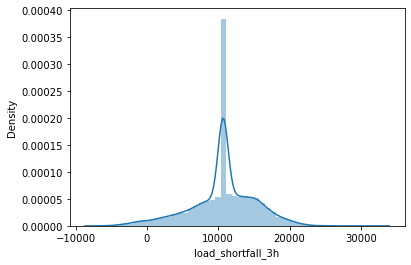

In [306]:
sns.distplot(dataframe['load_shortfall_3h'])

<b>We can deduce from the chart that</b>;
- Does not deviate from the normal distribution, has a gradual distribution for the indpendent variable observations
- Have appreciable symmetrical skewness.
- Show peakedness.

<b>Multivariate Analysis</b>

In [ ]:
'''
The dataframe.corr() code calculates the correlation matrix for the DataFrame dataframe. The correlation matrix shows the pairwise correlation coefficients between all pairs of numeric columns in the DataFrame.

The output is a square matrix where each entry (i, j) represents the correlation coefficient between columns i and j. The values range from -1 to 1, where:

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation,
0 indicates no correlation.
This matrix is useful for understanding the linear relationships between different variables in the dataset.

The resulting correlation DataFrame will have column and index names corresponding to the column names in dataframe, and the values will represent the correlation coefficients.
'''

In [307]:
correlation = dataframe.corr()
correlation

,Year,Month,Day,Hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Year,1.000000,-0.000452,-0.001320,0.000226,-0.011580,0.062176,-0.191407,0.054423,0.041900,0.025770,-0.018802,0.130914,-0.024476,-0.045667,-0.172568,-0.129145,0.011233,0.015695,-0.093252,-0.203106,-0.016533,-0.066386,-0.029817,-0.068520,0.020083,-0.098703,-0.020128,-0.046348,-0.004901,-0.050296,0.011170,0.141572,-0.234904,0.291251,0.015075,0.073951,0.122811,-0.151119,-0.029345,0.133934,-0.038048,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.003341,-0.002204,0.083047
Month,-0.000452,1.000000,0.009592,0.000226,-0.235733,-0.109152,-0.177464,-0.233550,-0.087993,-0.063884,-0.136215,-0.096566,-0.147646,-0.165337,-0.071538,0.056530,-0.093097,-0.128386,-0.026419,-0.006831,-0.064958,-0.065490,-0.028947,-0.047824,-0.075091,-0.049005,-0.019678,0.059657,0.025324,0.046454,0.096098,0.109583,0.201311,0.247235,0.213760,0.214722,0.151826,0.224983,0.188156,0.213168,0.235534,0.202973,0.216035,0.208299,0.246352,0.184902,0.281461,0.221140,0.196907,0.178560,0.172387
Day,-0.001320,0.009592,1.000000,0.000214,-0.038722,-0.025827,0.057068,-0.009837,0.024934,0.016621,0.028425,-0.029415,-0.014268,0.024520,-0.004093,-0.021121,-0.003460,-0.023455,0.019663,0.008805,-0.004364,-0.047709,0.013760,0.003701,0.006654,-0.019068,-0.019952,-0.009348,-0.013184,0.008041,0.000076,-0.035577,-0.012772,-0.018110,-0.002150,-0.001224,-0.007174,-0.010118,0.049875,0.001022,-0.004527,0.004298,-0.003606,0.003607,0.005728,-0.002441,0.005398,-0.006847,0.009484,0.026238,0.079783
Hour,0.000226,0.000226,0.000214,1.000000,0.188118,-0.171907,0.039779,0.212418,-0.432221,-0.313369,-0.022151,0.206420,-0.017705,0.143949,0.191400,-0.181017,0.025622,0.269876,0.009500,-0.061268,0.015112,0.020975,-0.007980,0.009426,0.063648,0.003138,-0.001179,-0.045798,0.000702,-0.013322,0.018749,-0.025935,0.246514,-0.012044,0.256799,0.272844,0.026548,0.326059,-0.349312,0.282792,0.193930,0.283683,0.218456,0.271493,0.264344,0.238515,0.249177,0.352601,0.284658,0.258025,0.120629
Madrid_wind_speed,-0.011580,-0.235733,-0.038722,0.188118,1.000000,0.112011,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,0.272295,-0.083599,0.245055,0.429858,0.062114,-0.185815,0.112461,0.062032,0.009569,0.004014,0.170672,-0.013045,0.018883,-0.178500,-0.094986,-0.278214,-0.119056,-0.240147,0.027694,-0.153231,0.109921,0.106533,-0.228350,0.059882,-0.293759,0.100117,0.038752,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.132085
Valencia_wind_deg,0.062176,-0.109152,-0.025827,-0.171907,0.112011,1.000000,0.174800,0.270834,0.276979,0.291152,0.143733,0.071520,0.082175,0.113183,0.020037,0.167319,0.116475,-0.038692,-0.002750,0.227690,-0.000324,0.057372,0.021683,-0.021004,-0.014082,0.008190,0.016777,-0.010123,-0.024319,-0.095854,-0.014487,-0.133859,-0.367882,-0.143871,-0.280860,-0.282348,-0.190282,-0.377259,-0.132809,-0.279917,-0.294823,-0.368756,-0.294921,-0.301837,-0.310330,-0.277645,-0.308790,-0.346848,-0.364499,-0.345021,-0.164215
Bilbao_rain_1h,-0.191407,-0.177464,0.057068,0.039779,0.247761,0.174800,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,0.070787,-0.020902,0.127963,0.118810,0.060390,0.067979,0.083222,0.096260,0.051968

The <b>load_shortfall_3h</b> variable is target. So, we should check how each attribute correlates with the target variable. We can do it as follows:-

In [ ]:
'''
The code calculates the correlation coefficients between the 'load_shortfall_3h' column and all other columns in the DataFrame dataframe, then sorts these correlation coefficients in descending order.
correlation['load_shortfall_3h']: Selects the correlation coefficients of the 'load_shortfall_3h' column with all other columns from the correlation matrix.

.sort_values(ascending=False): Sorts these correlation coefficients in descending order, from highest to lowest.

The resulting corrs Series will contain correlation coefficients sorted by their strength of correlation with the 'load_shortfall_3h' column. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values closer to 1 or -1 indicate stronger correlations.

This can be useful for identifying which variables are most strongly correlated (positively or negatively) with the 'load_shortfall_3h' column.
'''

In [308]:
corrs = correlation['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Valencia_temp_min       0.172422
Month                   0.172387
Madrid_temp             0.162652
Barcelona_temp_min      0.162047
Bilbao_temp_max         0.161400
Madrid_temp_max         0.160691
Bilbao_temp             0.154599
Barcelona_temp          0.154594
Madrid_temp_min         0.153214
Seville_temp_min        0.152095
Valencia_temp           0.150115
Bilbao_temp_min         0.149214
Barcelona_temp_max      0.143401
Seville_temp            0.136657
Bilbao_weather_id       0.128814
Valencia_temp_max       0.127034
Hour                    0.120629
Seville_temp_max        0.094554
Madrid_pressure         0.089124
Valencia_pressure       0.083461
Year                    0.083047
Day                     0.079783
Barcelona_weather_id    0.053732
Seville_weather_id      0.052216
Valencia_humidity       0.037796
Bilbao_pressure         0.034835
Madrid_weather_id       0.025232
Valencia_snow_3h       -0.021632
Madrid_rain_1h         -0.021892
Barcelona_

<b>Heat Map<b>

In [ ]:
'''
The code creates a correlation heatmap using the Seaborn library to visualize the correlation matrix of the DataFrame dataframe. Here's a breakdown of the code:
plt.figure(figsize=(24, 20)): Sets the size of the figure to 24 inches in width and 20 inches in height.
plt.title('Correlation Heatmap'): Sets the title of the heatmap.
sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white'): Creates a heatmap using Seaborn. The parameters include the correlation matrix (correlation), setting the plot to be a square, displaying annotations with two decimal places, and setting the line color between squares to white.
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90): Rotates the x-axis labels (column names) by 90 degrees for better readability.
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30): Rotates the y-axis labels (index names) by 30 degrees for better readability.
plt.show(): Displays the heatmap.
The resulting plot is a heatmap that visually represents the correlation matrix, making it easier to identify patterns and relationships between different variables in the dataset. Positive correlations are typically indicated by warmer colors, while negative correlations are indicated by cooler colors.
'''

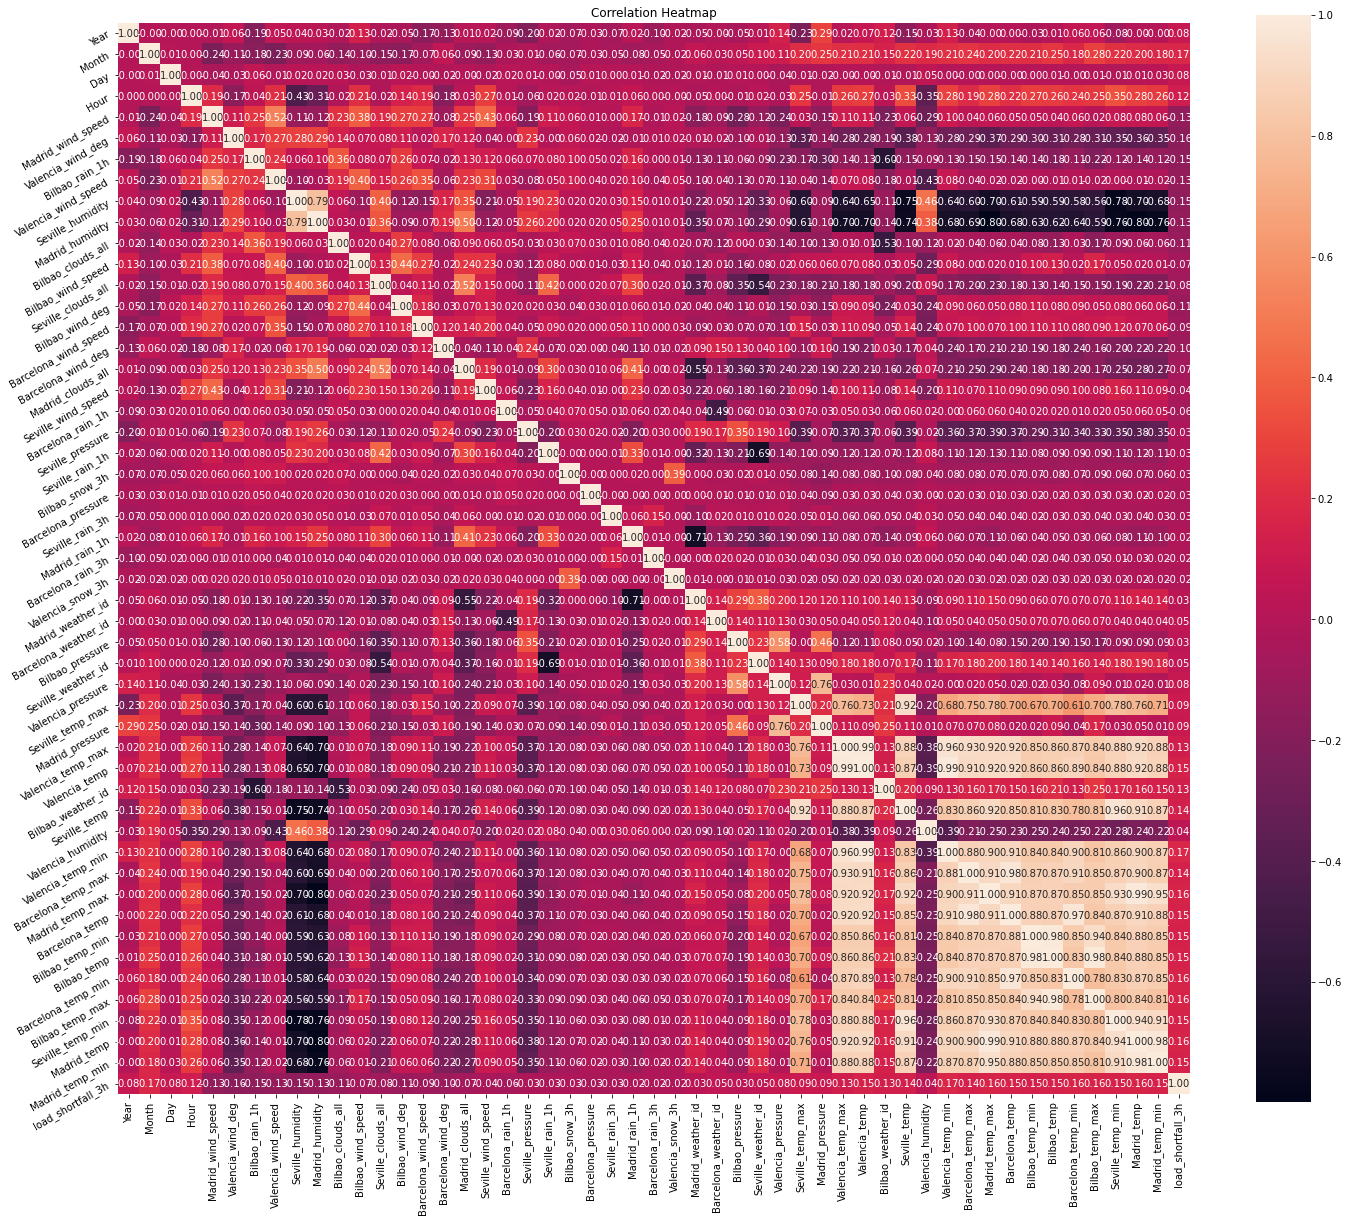

In [309]:
plt.figure(figsize=(24,20))
plt.title('Correlation Heatmap')
heatmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)           
plt.show()

<b>Interpretation From the above correlation heat map, we can conclude that :- (Using Pearson Correlation Coefficient) </b>

- The correlation coefficient ranges from -1 to +1.
<br><br>
- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with target variable.
<br><br>
- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with target variable.
<br><br>
- When it is close to 0, it means that there is no linear correlation. So, there is no correlation between the target and some of the independent variables, they are; <b>Madrid_pressure, Barcelona_weather_id, Seville_weather_id, Valencia_humidity, Bilbao_pressure, Madrid_weather_id, Barcelona_pressure, Seville_wind_speed, Bilbao_wind_speed, Madrid_clouds_all</b> and <b>Seville_clouds_all</b> 
<br>   <br>
- We can see that <b>Valencia_temp_min, Barcelona_temp_min, Madrid_temp, Barcelona_temp, Madrid_temp_max, Bilbao_temp_max , Bilbao_temp, Madrid_temp_min, Seville_temp_min, Valencia_temp, Bilbao_temp_min, Barcelona_temp_max, Seville_temp, Bilbao_weather_id, Valencia_temp_max </b> and <b>Seville_temp_max</b> have weak positive correlation with target variable
<br><br>
- We can also see that <b>Barcelona_wind_speed, Barcelona_wind_deg, Bilbao_wind_deg, Bilbao_clouds_all, Valencia_wind_speed, Madrid_humidity, Madrid_wind_speed</b> and <b>Seville_humidity</b> have weak negative correlation with target variable.

sns.set_style("whitegrid");
sns.pairplot(dataframe, hue="load_shortfall_3h");
plt.show();

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
'''
The code uses the statsmodels library to prepare an Ordinary Least Squares (OLS) regression model formula.
dfm = dataframe.copy(): Creates a copy of the DataFrame dataframe named dfm. This is to ensure that the original DataFrame is not modified during the modeling process.

y_name = 'load_shortfall_3h': Specifies the dependent variable (response variable) for the regression model.

X_names = [col for col in dfm.columns if col != y_name]: Defines the independent variables (predictors) by selecting all columns in dfm except for the dependent variable.

formula_str = y_name + " ~ " + " + ".join(X_names): Constructs the formula string for the OLS model. The formula follows the pattern "dependent_variable ~ independent_variable1 + independent_variable2 + ...". This line of code generates a string representing the formula.

print('Formula:\n\t {}'.format(formula_str)): Prints the constructed formula.

This formula can be used in the ols function from statsmodels to fit an OLS regression model using the specified variables.
'''

In [310]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = dataframe.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Year + Month + Day + Hour + Madrid_wind_speed + Valencia_wind_deg + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_pressure + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min


In [ ]:
'''
THe code fits an Ordinary Least Squares (OLS) regression model using the statsmodels library.
model = ols(formula=formula_str, data=dfm): Specifies the OLS model using the formula string (formula_str) and the data from the DataFrame dfm.

fitted = model.fit(): Fits the OLS model to the data.

print(fitted.summary()): Outputs a summary of the fitted model. The summary includes various statistical metrics, coefficients, p-values, and other information related to the regression model.

This summary provides insights into the relationships between the dependent variable ('load_shortfall_3h') and the independent variables included in the model. It includes information about the coefficients, standard errors, t-statistics, p-values, R-squared, and other relevant statistics.

Interpreting the summary is crucial for understanding the significance and impact of each variable on the dependent variable and assessing the overall fit of the model.

'''

In [311]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     39.30
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:58:14   Log-Likelihood:            -1.1399e+05
No. Observations:               11683   AIC:                         2.281e+05
Df Residuals:                   11632   BIC:                         2.285e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.825e+05 

Calculate the Correlation Coefficient

In [ ]:
'''
calculate the Pearson correlation coefficients between the 'load_shortfall_3h' column and all other columns in the DataFrame dataframe. The results are stored in a DataFrame named df_cp. 
from scipy.stats import pearsonr: Imports the pearsonr function from the scipy.stats module, which is used to calculate Pearson correlation coefficients.

dict_cp = {}: Initializes an empty dictionary to store correlation coefficients.

column_titles = [col for col in corrs.index if col != 'load_shortfall_3h']: Creates a list of column titles excluding the 'load_shortfall_3h' column.

The loop calculates the Pearson correlation coefficient for each column with respect to 'load_shortfall_3h' and stores the result in the dict_cp dictionary.

df_cp = pd.DataFrame(dict_cp).T: Creates a DataFrame (df_cp) from the dictionary, and the transpose (T) is applied to swap rows and columns for a more readable format.

The resulting df_cp DataFrame contains the correlation coefficients between each independent variable and the 'load_shortfall_3h' column.
'''

In [312]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    #p_val = round(pearsonr(dataframe[col], dataframe['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col]}

df_cp = pd.DataFrame(dict_cp).T
df_cp

,Correlation_Coefficient
Valencia_temp_min,0.172422
Month,0.172387
Madrid_temp,0.162652
Barcelona_temp_min,0.162047
Bilbao_temp_max,0.161400
Madrid_temp_max,0.160691
Bilbao_temp,0.154599
Barcelona_temp,0.154594
Madrid_temp_min,0.153214
Seville_temp_min,0.152095


Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame X

In [ ]:
'''
Let's prepare the dependent variable (y_data) and independent variable (X_data) for model building. 
y_data = dfm[y_name]: Extracts the dependent variable ('load_shortfall_3h') and assigns it to the variable y_data.

X_names = [col for col in dfm.columns if col != y_name]: Creates a list of column names excluding the dependent variable.

X_data = dataframe[X_names]: Constructs the independent variable DataFrame (X_data) by selecting all columns from the original DataFrame dataframe except the dependent variable.

These steps are common in preparing data for regression modeling, where y_data represents the target variable, and X_data represents the features used to predict the target variable.
'''

In [313]:
# The dependent variable remains the same:
y_data = dfm[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = [col for col in dfm.columns if col != y_name]
X_data = dataframe[X_names]

However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

In [ ]:
'''
Let's calculate the correlation matrix for the independent variable DataFrame X_data and then filters the matrix to show only those entries where the absolute correlation coefficient is greater than 0.1 or less than -0.1.

X_data.corr(): Calculates the correlation matrix for the independent variable DataFrame X_data.

np.abs(corr) > 0.1: Applies a condition to the correlation matrix to create a boolean matrix where each entry is True if the absolute value of the correlation coefficient is greater than 0.1 and False otherwise.

corr[np.abs(corr) > 0.1]: Filters the correlation matrix by keeping only those entries where the condition is True. This results in a DataFrame (corr_filtered) showing only the rows and columns where the absolute correlation coefficient is greater than 0.1 or less than -0.1.

The output (corr_filtered) will highlight pairs of variables that have a correlation greater than 0.1 or less than -0.1. This information can be useful for identifying multicollinearity or understanding relationships between independent variables in the dataset.
'''

In [314]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.1 or <-0.1
corr[np.abs(corr) > 0.1]

,Year,Month,Day,Hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
Year,1.000000,NaN,NaN,NaN,NaN,NaN,-0.191407,NaN,NaN,NaN,NaN,0.130914,NaN,NaN,-0.172568,-0.129145,NaN,NaN,NaN,-0.203106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141572,-0.234904,0.291251,NaN,NaN,0.122811,-0.151119,NaN,0.133934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,NaN,NaN,-0.235733,-0.109152,-0.177464,-0.233550,NaN,NaN,-0.136215,NaN,-0.147646,-0.165337,NaN,NaN,NaN,-0.128386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109583,0.201311,0.247235,0.213760,0.214722,0.151826,0.224983,0.188156,0.213168,0.235534,0.202973,0.216035,0.208299,0.246352,0.184902,0.281461,0.221140,0.196907,0.178560
Day,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,NaN,NaN,NaN,1.000000,0.188118,-0.171907,NaN,0.212418,-0.432221,-0.313369,NaN,0.206420,NaN,0.143949,0.191400,-0.181017,NaN,0.269876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246514,NaN,0.256799,0.272844,NaN,0.326059,-0.349312,0.282792,0.193930,0.283683,0.218456,0.271493,0.264344,0.238515,0.249177,0.352601,0.284658,0.258025
Madrid_wind_speed,NaN,-0.235733,NaN,0.188118,1.000000,0.112011,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,0.272295,NaN,0.245055,0.429858,NaN,-0.185815,0.112461,NaN,NaN,NaN,0.170672,NaN,NaN,-0.178500,NaN,-0.278214,-0.119056,-0.240147,NaN,-0.153231,0.109921,0.106533,-0.228350,NaN,-0.293759,0.100117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_wind_deg,NaN,-0.109152,NaN,-0.171907,0.112011,1.000000,0.174800,0.270834,0.276979,0.291152,0.143733,NaN,NaN,0.113183,NaN,0.167319,0.116475,NaN,NaN,0.227690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.133859,-0.367882,-0.143871,-0.280860,-0.282348,-0.190282,-0.377259,-0.132809,-0.279917,-0.294823,-0.368756,-0.294921,-0.301837,-0.310330,-0.277645,-0.308790,-0.346848,-0.364499,-0.345021
Bilbao_rain_1h,-0.191407,-0.177464,NaN,NaN,0.247761,0.174800,1.000000,0.240118,NaN,NaN,0.361385,NaN,NaN,0.255858,NaN,NaN,0.127963,0.118810,NaN,NaN,NaN,NaN,NaN,NaN,0.157344,NaN,NaN,-0.126045,-0.110104,NaN,NaN,-0.228479,-0.173351,-0.302455,-0.137050,-0.133444,-0.603190,-0.152139,NaN,-0.126690,-0.153656,-0.148284,-0.138938,-0.143191,-0.182022,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395
Valencia_wind_speed,NaN,-0.233550,NaN,0.212418,0.524549,0.270834,0.240118,1.000000,NaN,NaN,0.192272,0.398683,0.146475,0.255511,0.350592,NaN,0.229440,0.309374,NaN,NaN,NaN,0.101233,NaN,NaN,0.100311,NaN,NaN,-0.103358,NaN,-0.128770,NaN,-0.110231,NaN,-0.143971,NaN,NaN,-0.177013,NaN,-0.429268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_humidity,NaN,NaN,NaN,-0.432221,-0.114347,0.276979,NaN,NaN,1.000000,0.794435,NaN,NaN,0.397249,-0.118299,-0.154620,0.169172,0.347442,-0.205987,NaN,0.193054,0.229563,NaN,NaN,NaN,0.148648,NaN,NaN,-0.216339,NaN,-0.119706,-0.327958,NaN,-0.602483,NaN,-0.641650,-0.646328,-0.107606,-0.745160,0.459938,-0.635370,-0.602008,-0.699489,-0.605897,-0.593035,-0.589058,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070
Madrid_humidity,NaN,NaN,NaN,-0.313369,-0.116172,0.291152,NaN,NaN,0.794435,1.000000,NaN,NaN,0.363340,NaN,NaN,0.187128,

Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

In [ ]:
'''
Let's further refine the process of identifying highly correlated variables in the independent variable DataFrame X_data. Here's a breakdown of the code:
np.where(np.abs(corr) > 0.1): Finds the row and column indices where the absolute value of the correlation coefficient is greater than 0.1.

off_diagonal = np.where(r != c): Identifies indices where the row and column indices are not equal, ensuring that only off-diagonal entries are considered.

corr.iloc[r[off_diagonal], c[off_diagonal]]: Selects the rows and columns from the correlation matrix (corr) where we have highly correlated off-diagonal entries.

The resulting corr_highly_correlated DataFrame shows the correlation coefficients for pairs of variables that are highly correlated (greater than 0.1 or less than -0.1) and are off-diagonal. This information can be valuable for identifying and addressing multicollinearity in the dataset.
'''

In [315]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.1 or <-0.1
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.1)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Bilbao_rain_1h,Bilbao_wind_speed,Barcelona_wind_speed,Barcelona_wind_deg,Seville_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Bilbao_weather_id,Seville_temp,Valencia_temp_min,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Bilbao_clouds_all,Seville_clouds_all,Bilbao_wind_deg,Seville_wind_speed,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Seville_temp_max,Valencia_temp_max,...,Seville_rain_1h,Madrid_rain_1h,Madrid_weather_id,Seville_weather_id,Seville_temp_max,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp_min,Month,Hour,Valencia_wind_deg,Bilbao_rain_1h,Seville_humidity,Madrid_humidity,Seville_clouds_all,Barcelona_wind_deg,Madrid_clouds_all,Seville_pressure,Seville_rain_1h,Madrid_rain_1h,Madrid_weather_id,Seville_weather_id,Seville_temp_max,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp
Year,-0.191407,0.130914,-0.172568,-0.129145,-0.203106,0.141572,-0.234904,0.291251,0.122811,-0.151119,0.133934,-0.01158,0.062176,-0.191407,0.054423,-0.018802,-0.024476,-0.045667,0.015695,0.141572,-0.234904,0.291251,0.015075,0.073951,0.122811,-0.151119,-0.029345,0.133934,-0.038048,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.003341,-0.002204,-0.01158,0.062176,0.054423,0.04190,0.025770,0.130914,-0.045667,-0.172568,-0.129145,0.015695,-0.234904,0.015075,...,-0.016533,0.020083,-0.046348,0.011170,-0.234904,0.015075,0.073951,0.122811,-0.151119,-0.029345,0.133934,-0.038048,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.002204,-0.000452,0.000226,0.062176,-0.191407,0.04190,0.025770,-0.024476,-0.129145,0.011233,-0.203106,-0.016533,0.020083,-0.046348,0.011170,-0.234904,0.015075,0.073951,0.122811,-0.151119,-0.029345,0.133934,-0.038048,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.003341
Year,-0.191407,0.130914,-0.172568,-0.129145,-0.203106,0.141572,-0.234904,0.291251,0.122811,-0.151119,0.133934,-0.01158,0.062176,-0.191407,0.054423,-0.018802,-0.024476,-0.045667,0.015695,0.141572,-0.234904,0.291251,0.015075,0.073951,0.122811,-0.151119,-0.029345,0.133934,-0.038048,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.003341,-0.002204,-0.01158,0.062176,0.054423,0.04190,0.025770,0.130914,-0.045667,-0.172568,-0.129145,0.015695,-0.234904,0.015075,...,-0.016533,0.020083,-0.046348,0.011170,-0.234904,0.015075,0.073951,0.122811,-0.151119,-0.029345,0.133934,-0.038048,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.002204,-0.000452,0.000226,0.062176,-0.191407,0.04190,0.025770,-0.024476,-0.129145,0.011233,-0.203106,-0.016533,0.020083,-0.046348,0.011170,-0.234904,0.015075,0.073951,0.122811,-0.151119,-0.029345,0.133934,-0.038048,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.003341
Year,-0.191407,0.130914,-0.172568,-0.129145,-0.203106,0.141572,-0.234904,0.291251,0.122811,-0.151119,0.133934,-0.01158,0.062176,-0.191407,0.054423,-0.018802,-0.024476,-0.045667,0.015695,0.141572,-0.234904,0.291251,0.015075,0.073951,0.122811,-0.151119,-0.029345,0.133934,-0.038048,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.003341,-0.002204,-0.01158,0.062176,0.054423,0.04190,0.025770,0.130914,-0

In [ ]:
'''
Lets update the OLS formula based on the subset of independent variables identified as highly correlated in the previous steps
X_corr_names = X_names: Assigns the names of the original independent variables (X_names) to a new variable X_corr_names.

formula_str = y_name + ' ~ ' + ' + '.join(X_corr_names): Constructs the new OLS formula using the dependent variable (y_name) and the names of the independent variables in the subset. The formula follows the pattern "dependent_variable ~ independent_variable1 + independent_variable2 + ...".

print('Formula:\n\t{}'.format(formula_str)): Prints the updated OLS formula.

This step ensures that the OLS model is built using only the subset of independent variables that were identified as highly correlated, helping to address multicollinearity in the model.
'''

In [316]:
# Lets take a new subset of our potential independent variables
X_corr_names = X_names

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Year + Month + Day + Hour + Madrid_wind_speed + Valencia_wind_deg + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_pressure + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

Model prediction of Loan Size

In [ ]:
'''
We  import necessary modules from the scikit-learn library for building and evaluating a linear regression model.
from sklearn.linear_model import LinearRegression: Imports the LinearRegression class from scikit-learn, which is used for building linear regression models.

from sklearn.model_selection import train_test_split: Imports the train_test_split function from scikit-learn, which is commonly used to split a dataset into training and testing sets. This is essential for evaluating the model's performance on unseen data.

These modules will be used to train a linear regression model on the training set and evaluate its performance on the testing set. The LinearRegression class provides methods for fitting the model to the training data and making predictions. The train_test_split function will be used to create separate training and testing datasets for model evaluation.
'''

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<b>Preprocess data</b><br>
First we need to make sure that all models are trained and tested on the same data.

In [ ]:
'''
We extracted only the independent variables that were identified as highly correlated from the training and testing sets. 
X_train[X_corr_names]: Selects only the columns corresponding to the highly correlated independent variables (X_corr_names) from the training set X_train.

X_test[X_corr_names]: Selects the same set of columns from the testing set X_test.

This step ensures that the linear regression model will be trained and evaluated using only the subset of independent variables that were identified as highly correlated in the previous steps.
'''

In [318]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

<b>Fit models</b><br>
Next we instantiate and fit our models

In [ ]:
'''
The provided code initializes a linear regression model using the LinearRegression class from scikit-learn.
This line creates an instance of the LinearRegression class, which can be used to fit a linear regression model to the training data and make predictions on new data. The lr variable now holds the linear regression model, and we can proceed to train the model and evaluate its performance.
'''

In [319]:
lr = LinearRegression()
#lr_corr = LinearRegression()
#lr_var = LinearRegression()

In [ ]:
'''
The code uses the train_test_split function from scikit-learn to split the data into training and testing sets. 
X_data: The independent variable DataFrame.
y_data: The dependent variable.
Parameters for train_test_split:

test_size=0.20: Specifies that 20% of the data will be used as the test set, and the remaining 80% will be used as the training set.
random_state=45: Sets the random seed for reproducibility. This ensures that the same split is obtained if the code is run again with the same random seed.
After executing this code, we will have four sets of data: X_train (independent variables for training), X_test (independent variables for testing), y_train (dependent variable for training), and y_test (dependent variable for testing). These sets can be used to train and evaluate the linear regression model.
'''

In [396]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    random_state=45)

In [ ]:
'''
Let's fit a linear regression model to the training data (X_train, y_train) using the fit method and then makes predictions on the testing data (X_test) using the predict method. 
lr.fit(X_train, y_train): Fits the linear regression model to the training data. The model learns the relationships between the independent variables (X_train) and the dependent variable (y_train).

preds = lr.predict(X_test): Makes predictions on the testing data (X_test) using the trained linear regression model. The predicted values are stored in the preds variable.

After running this code, preds will contain the predicted values for the dependent variable based on the linear regression model. These predictions can be compared with the actual values (y_test) to evaluate the model's performance.
'''

In [397]:
lr.fit(X_train, y_train)
#lr_corr.fit(X_corr_train,y_train);
#lr_var.fit(X_var_train,y_train);

preds = lr.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [398]:
# Compare model performance

In [399]:
# Choose best model and motivate why it is the best choice

In [ ]:
'''
We import the metrics module from scikit-learn, which includes various metrics for evaluating the performance of machine learning models, and the math module. 
These modules can be used to assess the performance of the linear regression model by comparing the predicted values (preds) with the actual values (y_test). For example, common regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) can be calculated using functions from the metrics module.
'''

In [400]:
from sklearn import metrics
import math

In [ ]:
'''
Let's define a function named RMSE (Root Mean Squared Error) that calculates the square root of the mean squared error between the true values (y_test) and the predicted values (y_predict). 
metrics.mean_squared_error(y_test, y_predict): Calculates the mean squared error between the true values (y_test) and the predicted values (y_predict) using the mean_squared_error function from the metrics module.

math.sqrt(...): Takes the square root of the mean squared error, resulting in the RMSE.

This function can be used to evaluate the performance of the linear regression model by providing the true values (y_test) and the predicted values (y_predict). Lower RMSE values indicate better model performance.
'''

In [401]:
def RMSE(y_test, y_predict):
    return math.sqrt(metrics.mean_squared_error(y_test, y_predict))

In [ ]:
'''
The RMSE function is applied to calculate the Root Mean Squared Error (RMSE) between the true values (y_test) and the predicted values (preds). The resulting RMSE provides a measure of the model's accuracy in predicting the dependent variable.
This line of code calls the RMSE function with y_test as the true values and preds as the predicted values, computing the RMSE for the linear regression model on the test set. The RMSE value is a measure of how well the model's predictions align with the actual values, with lower values indicating better performance.
'''

In [402]:
RMSE(y_test, preds)

4250.047096809056

In [ ]:
'''
import the r2_score function from scikit-learn's metrics module. The R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
After importing the r2_score function, we use it to calculate the R-squared score to evaluate the performance of our regression model as seen in the second cell below. Typically, a higher R-squared value indicates a better fit of the model to the data.
'''

In [403]:
from sklearn.metrics import r2_score

In [404]:
r2_score(y_test, preds)

0.07961884465102143

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [405]:
# discuss chosen methods logic

In [406]:
X_train.head()

,Year,Month,Day,Hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
4631,2016,8,2,12,1.333333,3,0.0,2.666667,44.333333,37.666667,6.666667,0.666667,0.000000,46.666667,6.666667,210.000000,0.000000,1.000000,0.0,13,0.0,0.0,1019.333333,0.0,0.0,0.0,0.0,800.000000,801.0,1022.0,800.000000,1020.000000,315.483333,1021.000000,305.926667,303.980000,800.333333,308.110000,55.333333,301.850000,305.186667,306.850000,302.003333,294.593333,298.610000,300.186667,303.520000,302.483333,303.990000,302.640000
7779,2017,8,31,0,2.666667,6,0.7,1.333333,70.333333,47.666667,86.333333,1.333333,0.000000,221.333333,3.666667,261.666667,0.000000,3.000000,0.0,8,0.0,0.0,1014.333333,0.0,0.0,0.0,0.0,800.000000,800.0,1020.0,800.000000,1014.000000,296.150000,1016.333333,297.483333,297.483333,507.333333,295.540000,70.333333,297.483333,296.816667,295.816667,296.316667,287.150000,288.483333,295.816667,290.150000,295.150000,295.003333,294.483333
3761,2016,4,15,18,7.000000,5,0.1,2.333333,66.666667,40.333333,75.000000,2.333333,33.333333,290.666667,3.666667,216.666667,51.666667,7.333333,0.0,5,0.0,0.0,1009.666667,0.0,0.0,0.0,0.0,802.333333,801.0,1006.0,801.666667,1008.333333,300.150000,1010.000000,294.583333,293.433333,702.000000,295.276667,55.000000,292.116667,290.150000,291.816667,290.150000,289.150000,289.890000,290.150000,290.816667,292.150000,291.083333,289.983333
5789,2016,12,25,6,1.333333,9,0.0,2.000000,89.000000,100.000000,90.000000,0.333333,0.000000,0.000000,1.000000,214.666667,75.000000,5.333333,0.0,25,0.0,0.0,1032.666667,0.0,0.0,0.0,0.0,714.333333,800.0,1037.0,780.333333,1018.000000,290.150000,1036.000000,279.150000,279.150000,741.000000,285.913333,95.333333,279.150000,280.816667,276.816667,278.650000,278.816667,279.873333,276.483333,281.150000,282.150000,276.153333,275.483333
3715,2016,4,10,0,3.000000,6,0.0,1.666667,78.666667,58.000000,75.000000,0.000000,0.000000,17.333333,1.333333,175.000000,0.000000,3.000000,0.0,4,0.0,0.0,1011.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1007.0,800.000000,1009.666667,296.373333,1009.000000,290.352333,287.935667,769.000000,290.583333,69.333333,286.485667,285.316667,284.818333,285.316667,277.945000,277.945000,285.316667,277.945000,287.040000,284.518333,284.251667


SUMBISSION

In [ ]:
'''
We created training (X_train) and testing (X_test) sets for the independent variables (X_data) based on the original dataframe. It splits the data by taking the rows from the beginning up to the length of the training set for X_train and the rows from the length of the training set to the end for X_test. The 'load_shortfall_3h' column is dropped from both sets.
dataframe[:len(df_train)]: Selects rows from the beginning up to the length of the training set. This creates the training set for the independent variables.

.drop('load_shortfall_3h', axis=1): Drops the 'load_shortfall_3h' column from the selected rows.

dataframe[len(df_train):]: Selects rows from the length of the training set to the end. This creates the testing set for the independent variables.

.drop('load_shortfall_3h', axis=1): Drops the 'load_shortfall_3h' column from the selected rows.

Now, X_train and X_test represent the independent variables for the training and testing sets, respectively.
'''

In [407]:
X_train = dataframe[:len(df_train)].drop('load_shortfall_3h', axis=1)
X_test = dataframe[len(df_train):].drop('load_shortfall_3h', axis=1)

lr.fit(X_train, y_name)

preds = lr.predict(X_test)

In [ ]:
'''
We create a new DataFrame (daf) using the predicted values (preds) and assigns the column name 'load_shortfall_3h' to the single column in the DataFrame. The tail() function is then used to display the last few rows of the DataFrame. 
This DataFrame (daf) can be used to examine the predicted values for the 'load_shortfall_3h' variable based on the linear regression model.
'''

In [412]:
daf=pd.DataFrame(preds, columns=['load_shortfall_3h'])
daf.tail()

,load_shortfall_3h
2332,11703.406942
2333,14048.835810
2334,11765.866362
2335,12526.937615
2336,14140.286881


In [ ]:
'''
We create a DataFrame (output) containing the 'time' column from the testing set (df_test). Then, it joins this DataFrame with the previously created DataFrame (daf) containing the predicted values for 'load_shortfall_3h'. Finally, it exports the resulting DataFrame to a CSV file named "submission.csv" without including the index. 
This CSV file is used as a submission file for the competition. It includes the 'time' column and the corresponding predicted values for 'load_shortfall_3h'.
'''

In [413]:
output = pd.DataFrame({'time':df_test['time']})
submission = output.join(daf)
submission.to_csv("submission.csv", index=False)

In [ ]:
# Let's view the content of the submission csv file 

In [414]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,11947.173073
1,2018-01-01 03:00:00,8497.030463
2,2018-01-01 06:00:00,11623.746644
3,2018-01-01 09:00:00,11022.896424
4,2018-01-01 12:00:00,10344.181628
...,...,...
2915,2018-12-31 09:00:00,NaN
2916,2018-12-31 12:00:00,NaN
2917,2018-12-31 15:00:00,NaN
2918,2018-12-31 18:00:00,NaN
